# I. Baseline Installation

## I.1 Set up and requirements

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os, shutil
P7_PATH = '/content/drive/MyDrive/OC/P7'

In [ ]:
if not os.path.exists("/content/Mask_RCNN"):
     !git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 30.41 MiB/s, done.
Resolving deltas: 100% (565/565), done.


In [ ]:
cd '/content/Mask_RCNN'

/content/Mask_RCNN


In [ ]:
if not 'REQUIREMENTS_DOWNLOADED' in globals():
    !pip3 install -r requirements.txt
    REQUIREMENTS_DOWNLOADED = True

In [ ]:
if not 'SETUP_DONE' in globals():
    !python3 setup.py install
    SETUP_DONE = True

In [ ]:
if not 'PYCOCOTOOLS' in globals():
    !pip install pycocotools
    PYCOCOTOOLS = True

In [ ]:
#!tf_upgrade_v2 --intree Mask_RCNN --inplace --reportfile report.txt

In [ ]:
#replace model.py by my model.py file
source = os.path.join(P7_PATH, 'model.py')
dest = os.path.join('/content/Mask_RCNN/mrcnn', 'model.py')
shutil.copy(source, dest)



'/content/Mask_RCNN/mrcnn/model.py'

In [ ]:
#replace image files by my image files
source_rep = os.path.join(P7_PATH, 'images')
dest_rep = os.path.join('/content/Mask_RCNN/images')

for img_name in os.listdir(source_rep):
    
    source_img = os.path.join(source_rep, img_name)
    dest_img   = os.path.join(dest_rep, img_name)

    if os.path.isfile(source_img):
        if not os.path.exists(os.path.join(dest_img)):
            shutil.copy(source_img, dest_img)
            print(img_name, 'copied')

Casper.png copied
theatre.jpg copied
beagle.png copied
waste-paper.jpg copied


## I.2 imports of libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow
print(tensorflow.__version__)
import sys, os
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

2.6.0


#II. Pretrained Mask-RCNN Model on Coco dataset

##II.1 Import of model and libraries

In [ ]:
# Root directory of the project
ROOT_DIR = os.path.abspath("./")
print(ROOT_DIR)

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib #module model.py
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, 'samples', "coco/"))  # To find local version
import coco

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH) #download model

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

/content/Mask_RCNN
... done downloading pretrained model!


In [ ]:
class InferenceConfig(coco.CocoConfig): #module coco.py, Class CocoConfig

    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config) #Class MaskRCNN
# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)                               #Class MaskRCNN, load weights  of model COCO_MODEL_PATH = 'ROOT_DIR/mask_rcnn_coco.h5'

Instructions for updating:
Use fn_output_signature instead
Instructions for updating:
Use `tf.cast` instead.


In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

##II.2 Custom functions for mask display and masks pixels ratio calculation

In [ ]:
def show_masks(results): #display the masks for the set of images
    list_arr = []
    list_NB_pixels = []
    list_ind = results[0]['class_ids'].tolist()
    list_classes = [class_names[c] for c in list_ind]
    print('classes:', list_classes)
    print('\n')

    h, w = results[0]['masks'][:,:,0].shape
    NB_masks = results[0]['masks'].shape[2]

    nb_col_max = 3
    if NB_masks<=nb_col_max:
        nr = 1
        nc = NB_masks
    else:
        nc = nb_col_max
        nr = int(np.ceil(NB_masks/nb_col_max))

    plt.subplots(nr, nc)
    plt.gcf().set_size_inches(7 * int(min(nc, nb_col_max)),nr * 5)    
    for i in range(NB_masks):
        arr_img = results[0]['masks'][:,:,i]
        arr_img = np.expand_dims(arr_img, axis=2)
        X = np.zeros((h,w,3))
        for j in range(3):
            X[:,:,j] = arr_img[:, :, 0]
        list_arr.append(X)

        df_mask = pd.DataFrame(list_arr[i][:,:,0])
        NB_pixels_à_1 = df_mask.sum().sum()
        list_NB_pixels.append(NB_pixels_à_1)
        NB_pixels_tot = w*h

        ax = plt.subplot(nr, nc, i+1)

        plt.imshow(X)
        ax.set_xlabel('{1:g} / {2} = \n{0:.1f}% of total size'.format(100*NB_pixels_à_1/NB_pixels_tot, NB_pixels_à_1, NB_pixels_tot), size=14)
        ax.set_title ("CLASSE '{0}'".format(list_classes[i]), size=18, color="#ea253f", pad=10)
    plt.tight_layout(w_pad = 2, h_pad = 4)

    return list_classes, list_NB_pixels


In [ ]:
def display_class_area_size(list_c, list_px):   #Compute the required size ratio of each particular class vs all classes size 
    df = pd.DataFrame ([list_c, list_px]).transpose()
    df.columns = ['class', 'px']
    TOT_px_class = df.px.sum()

    dg = pd.DataFrame(df.groupby('class').sum()['px'])
    dg['px'] = dg['px'].astype('int64')
    dg['ratio (%)'] =round(100* dg['px']/TOT_px_class, 2)

    return dg

In [ ]:
"""   
import shutil

print(os.path.exists("/content/drive/MyDrive/OC/P7/images"))

for file_name in os.listdir(os.path.join(ROOT_DIR, 'images')):
    source = os.path.join(ROOT_DIR, 'images', file_name)
    destination = os.path.join("/content/drive/MyDrive/OC/P7/images", file_name)
    if os.path.isfile(source) and os.path.exists("/content/drive/MyDrive/OC/P7/images"): 
        shutil.copy(source, destination)
        print('copied:', file_name)
    else:
        print('failure')
"""

'   \nimport shutil\n\nprint(os.path.exists("/content/drive/MyDrive/OC/P7/images"))\n\nfor file_name in os.listdir(os.path.join(ROOT_DIR, \'images\')):\n    source = os.path.join(ROOT_DIR, \'images\', file_name)\n    destination = os.path.join("/content/drive/MyDrive/OC/P7/images", file_name)\n    if os.path.isfile(source) and os.path.exists("/content/drive/MyDrive/OC/P7/images"): \n        shutil.copy(source, destination)\n        print(\'copied:\', file_name)\n    else:\n        print(\'failure\')\n'

## II.3 Tests and results on various images

In [ ]:
file_names = []
for root, dir, files in os.walk(IMAGE_DIR):
    file_names.append(files)
file_names = file_names[0] #list of filenames

**Test 1**

Processing 1 images
image                    shape: (428, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


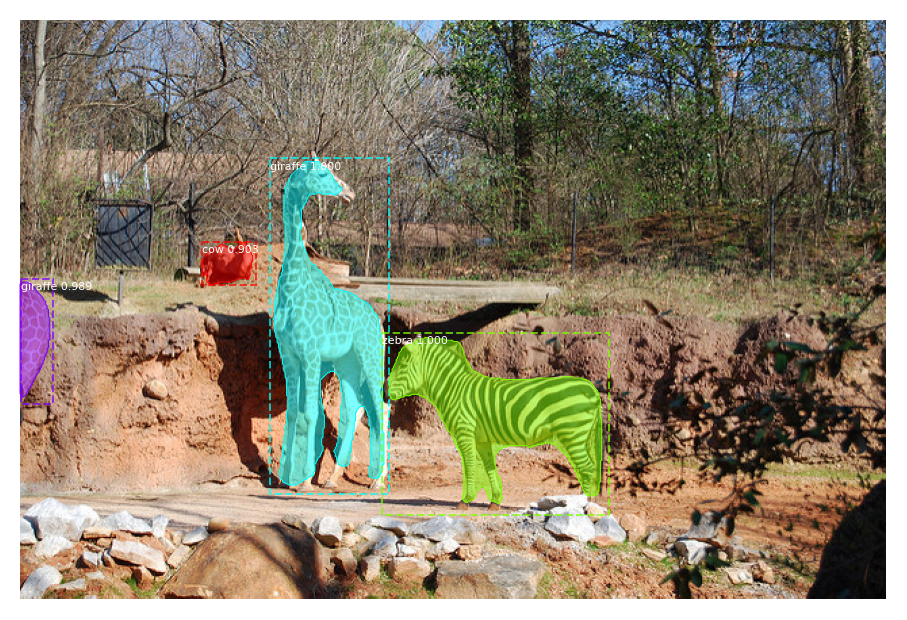

In [ ]:
image = skimage.io.imread(os.path.join(IMAGE_DIR, '2383514521_1fc8d7b0de_z.jpg'))
# Run detection
results = model.detect([image], verbose=1)
# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

classes: ['giraffe', 'zebra', 'giraffe', 'cow']




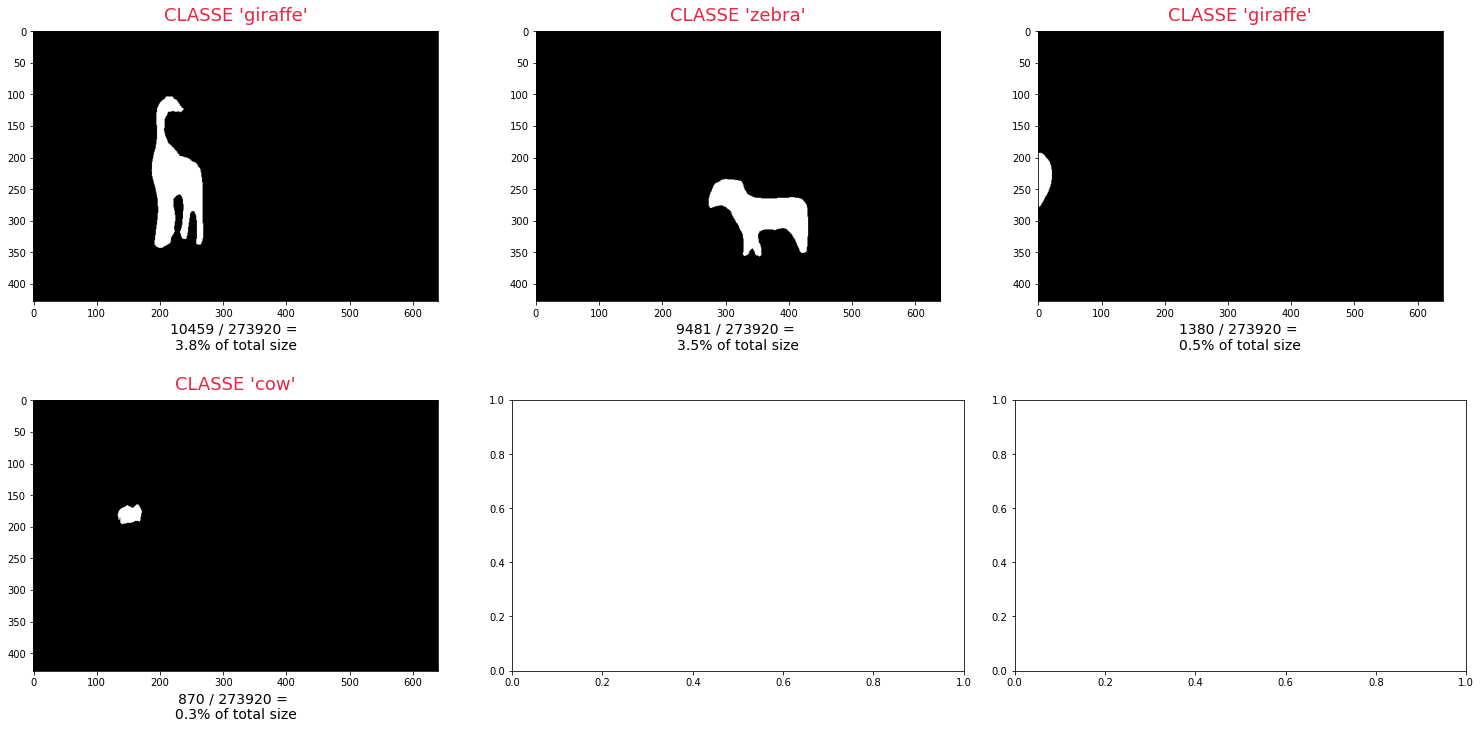

In [ ]:
list_c, list_px = show_masks(results)

In [ ]:
display_class_area_size(list_c, list_px)

px  ratio (%)
class                    
cow        870       3.92
giraffe  11839      53.35
zebra     9481      42.73

**Test 2**

Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


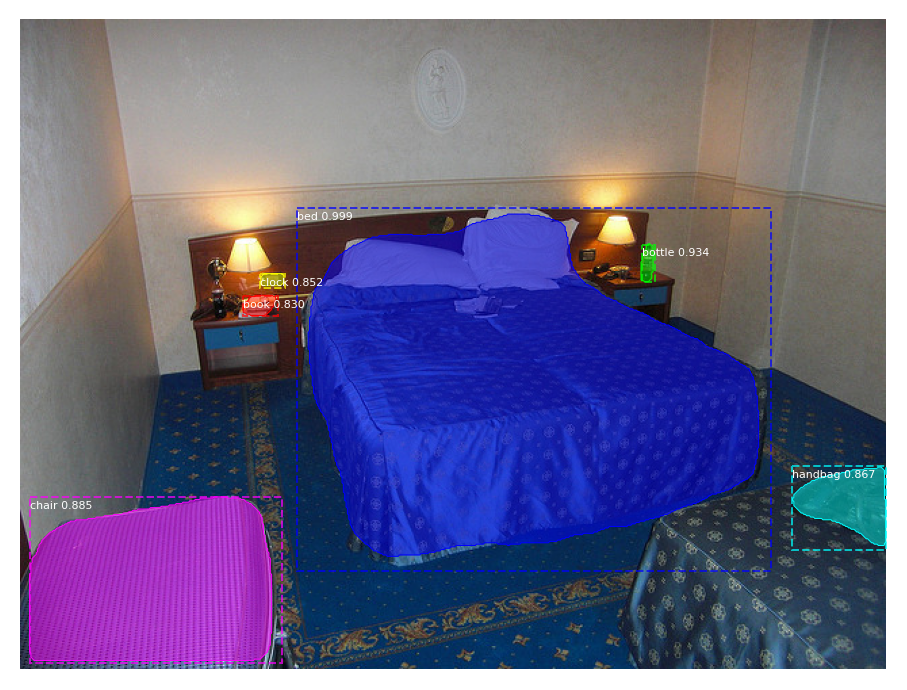

In [ ]:
image = skimage.io.imread(os.path.join(IMAGE_DIR, file_names[np.random.choice(len(file_names))]))
# Run detection
results = model.detect([image], verbose=1)
# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

classes: ['bed', 'bottle', 'chair', 'handbag', 'clock', 'book']




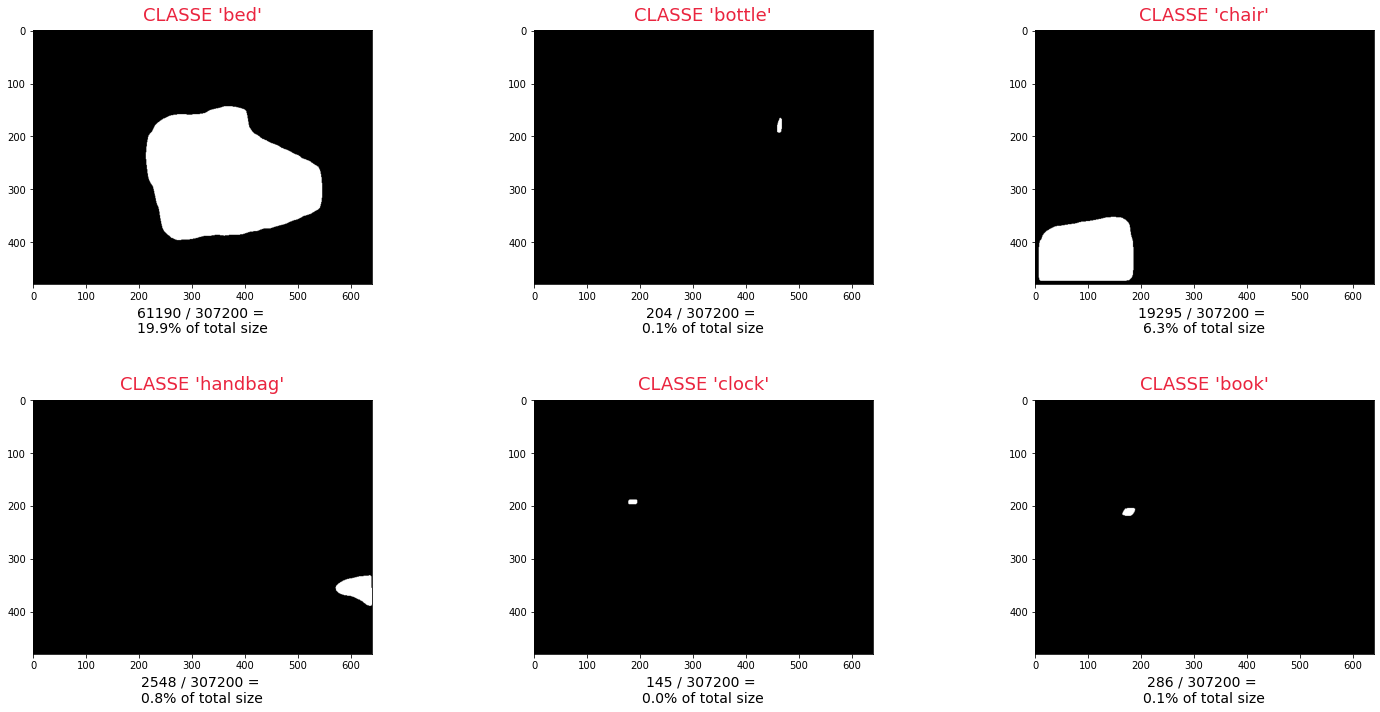

In [ ]:
list_c, list_px = show_masks(results)

In [ ]:
display_class_area_size(list_c, list_px)

px  ratio (%)
class                    
bed      61190      73.13
book       286       0.34
bottle     204       0.24
chair    19295      23.06
clock      145       0.17
handbag   2548       3.05

**Test 3**

Processing 1 images
image                    shape: (595, 597, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


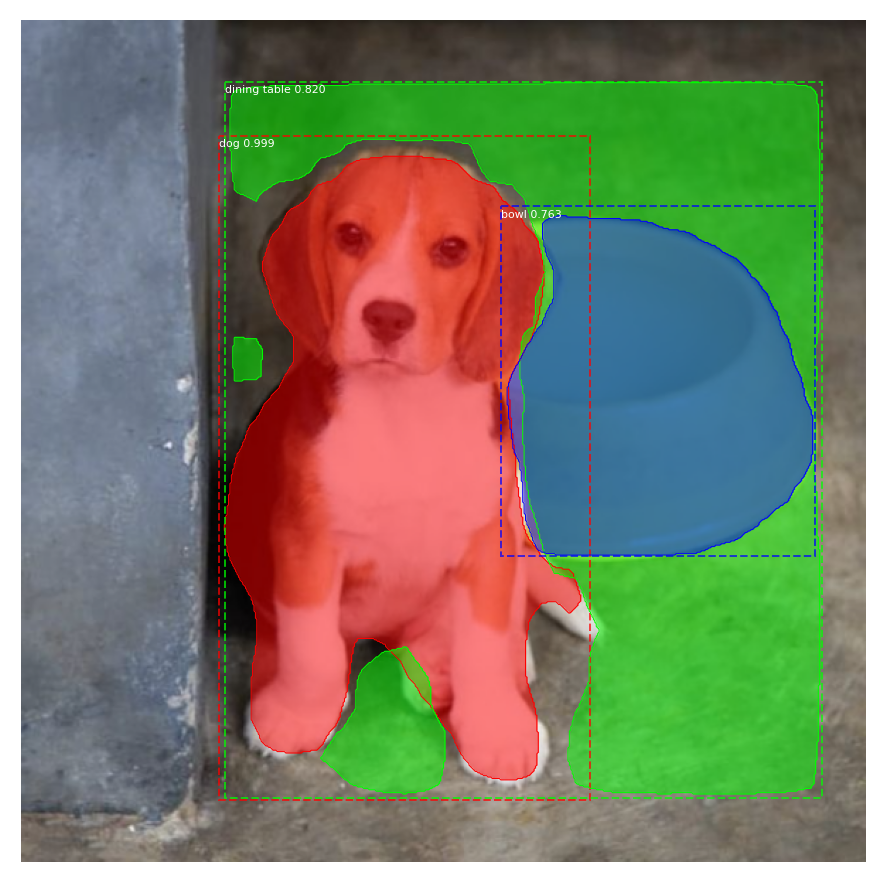

In [ ]:
image = skimage.io.imread(os.path.join(IMAGE_DIR, 'beagle.png'))
# Run detection
results = model.detect([image], verbose=1)
# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

classes: ['dog', 'dining table', 'bowl']




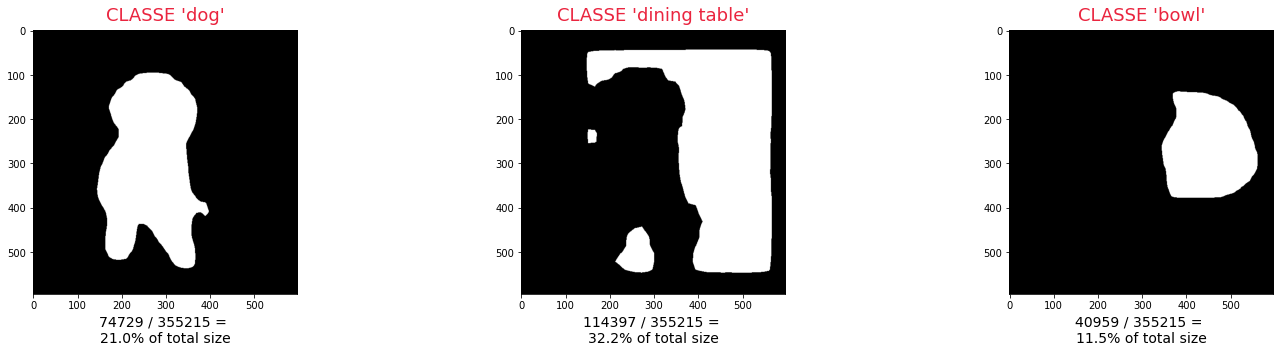

In [ ]:
list_c, list_px = show_masks(results)

In [ ]:
display_class_area_size(list_c, list_px)

px  ratio (%)
class                          
bowl           40959      17.80
dining table  114397      49.72
dog            74729      32.48

**Test 4**

Processing 1 images
image                    shape: (597, 603, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


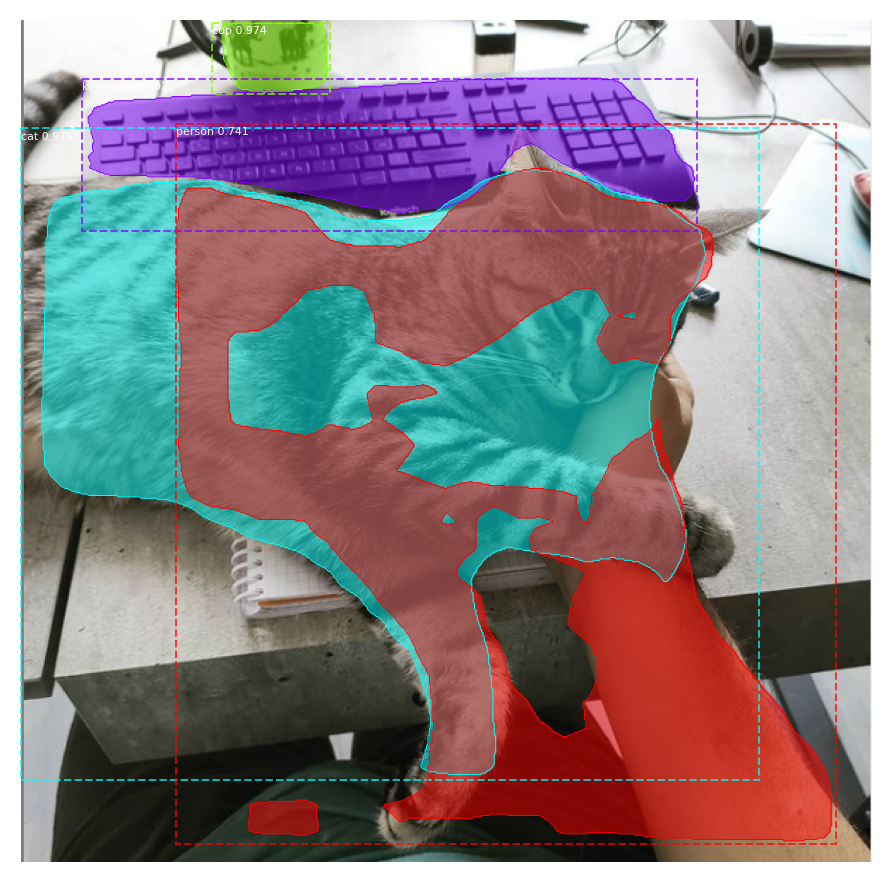

In [ ]:
image = skimage.io.imread(os.path.join(IMAGE_DIR, 'Casper.png'))
# Run detection
results = model.detect([image], verbose=1)
# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

classes: ['keyboard', 'cat', 'cup', 'person']




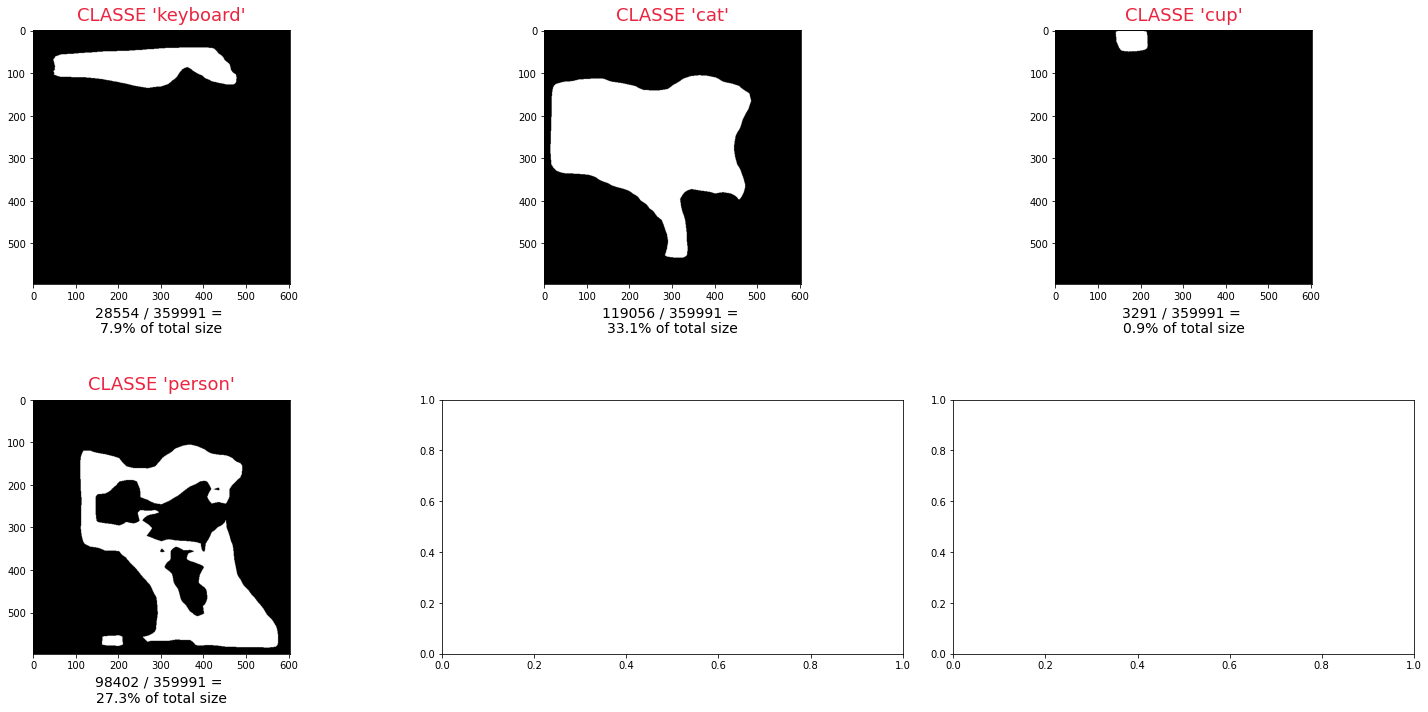

In [ ]:
list_c, list_px = show_masks(results)

In [ ]:
display_class_area_size(list_c, list_px)

px  ratio (%)
class                      
cat       119056      47.76
cup         3291       1.32
keyboard   28554      11.45
person     98402      39.47

**Test 5**

Processing 1 images
image                    shape: (407, 474, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


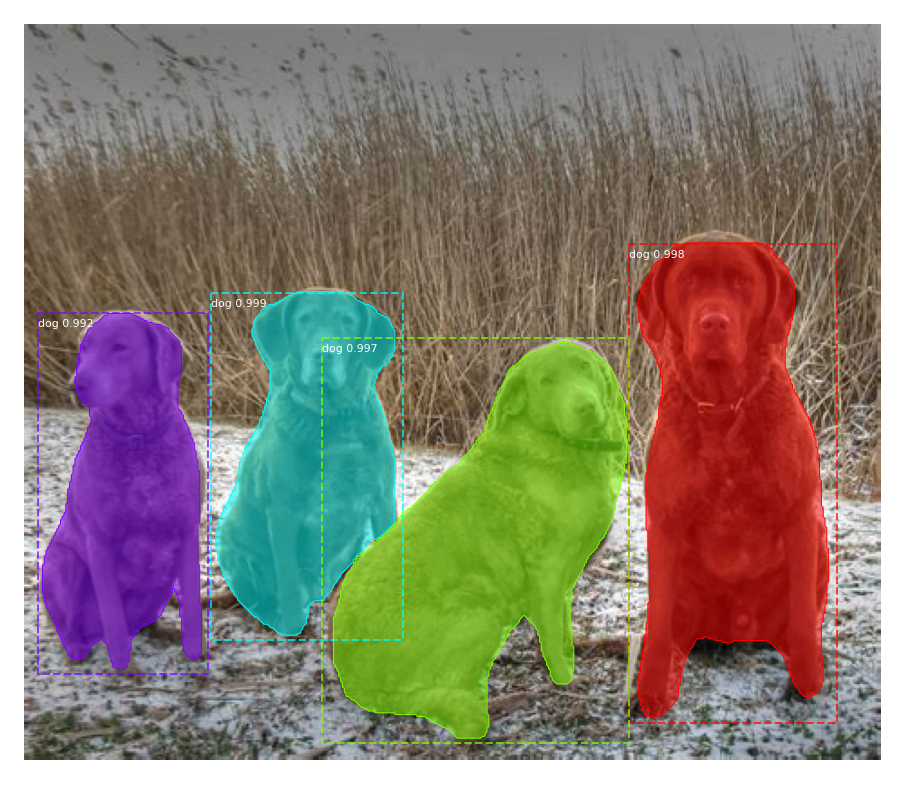

In [ ]:
image = skimage.io.imread(os.path.join(IMAGE_DIR, 'chesapeake bay retrievers.jfif'))
# Run detection
results = model.detect([image], verbose=1)
# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

classes: ['dog', 'dog', 'dog', 'dog']




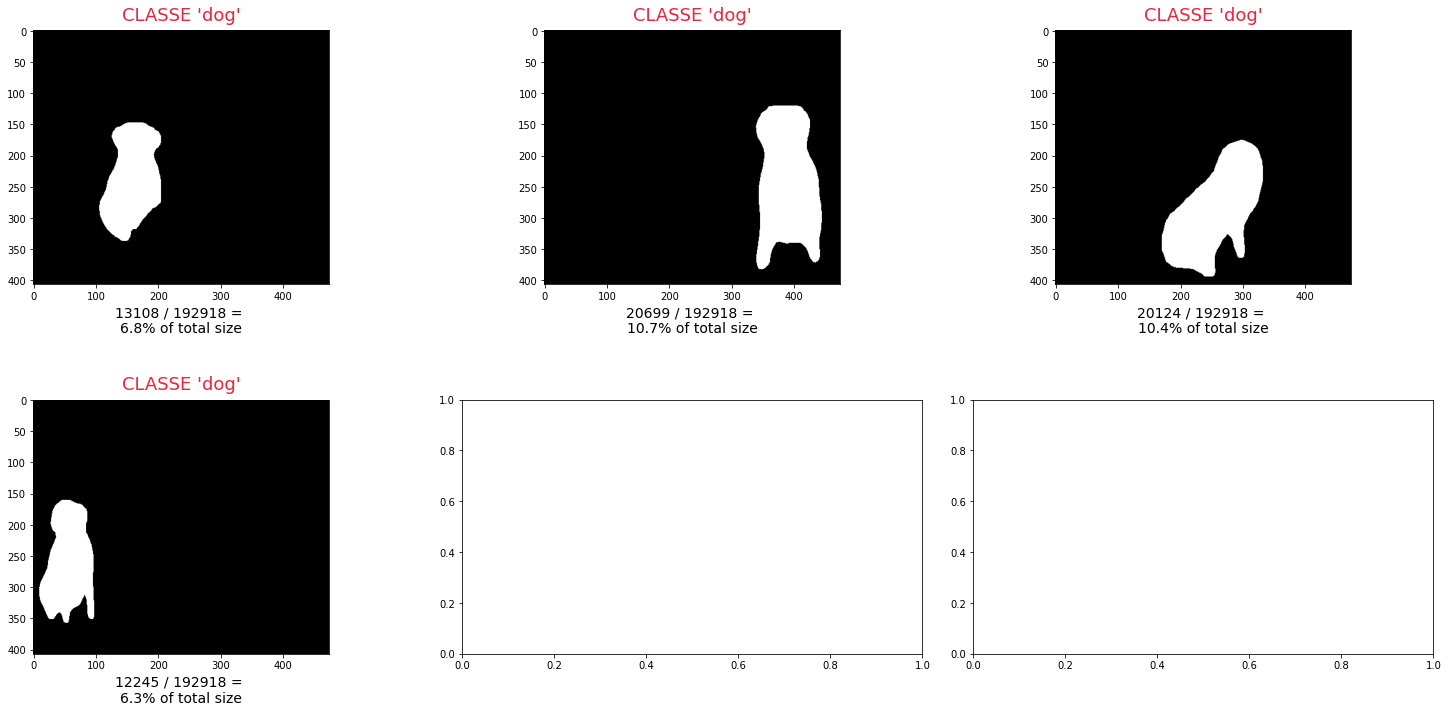

In [ ]:
list_c, list_px = show_masks(results)

In [ ]:
display_class_area_size(list_c, list_px)

px  ratio (%)
class                  
dog    66176      100.0

**Test 6**

Processing 1 images
image                    shape: (800, 1200, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1200.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


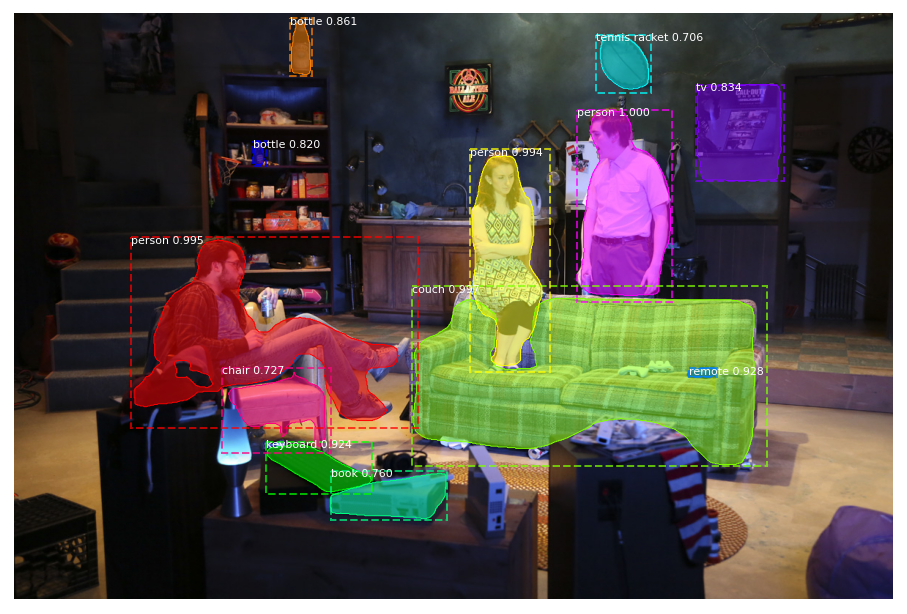

In [ ]:
image = skimage.io.imread(os.path.join(IMAGE_DIR, 'theatre.jpg'))
# Run detection
results = model.detect([image], verbose=1)
# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

classes: ['person', 'couch', 'person', 'person', 'remote', 'keyboard', 'bottle', 'tv', 'bottle', 'book', 'chair', 'tennis racket']




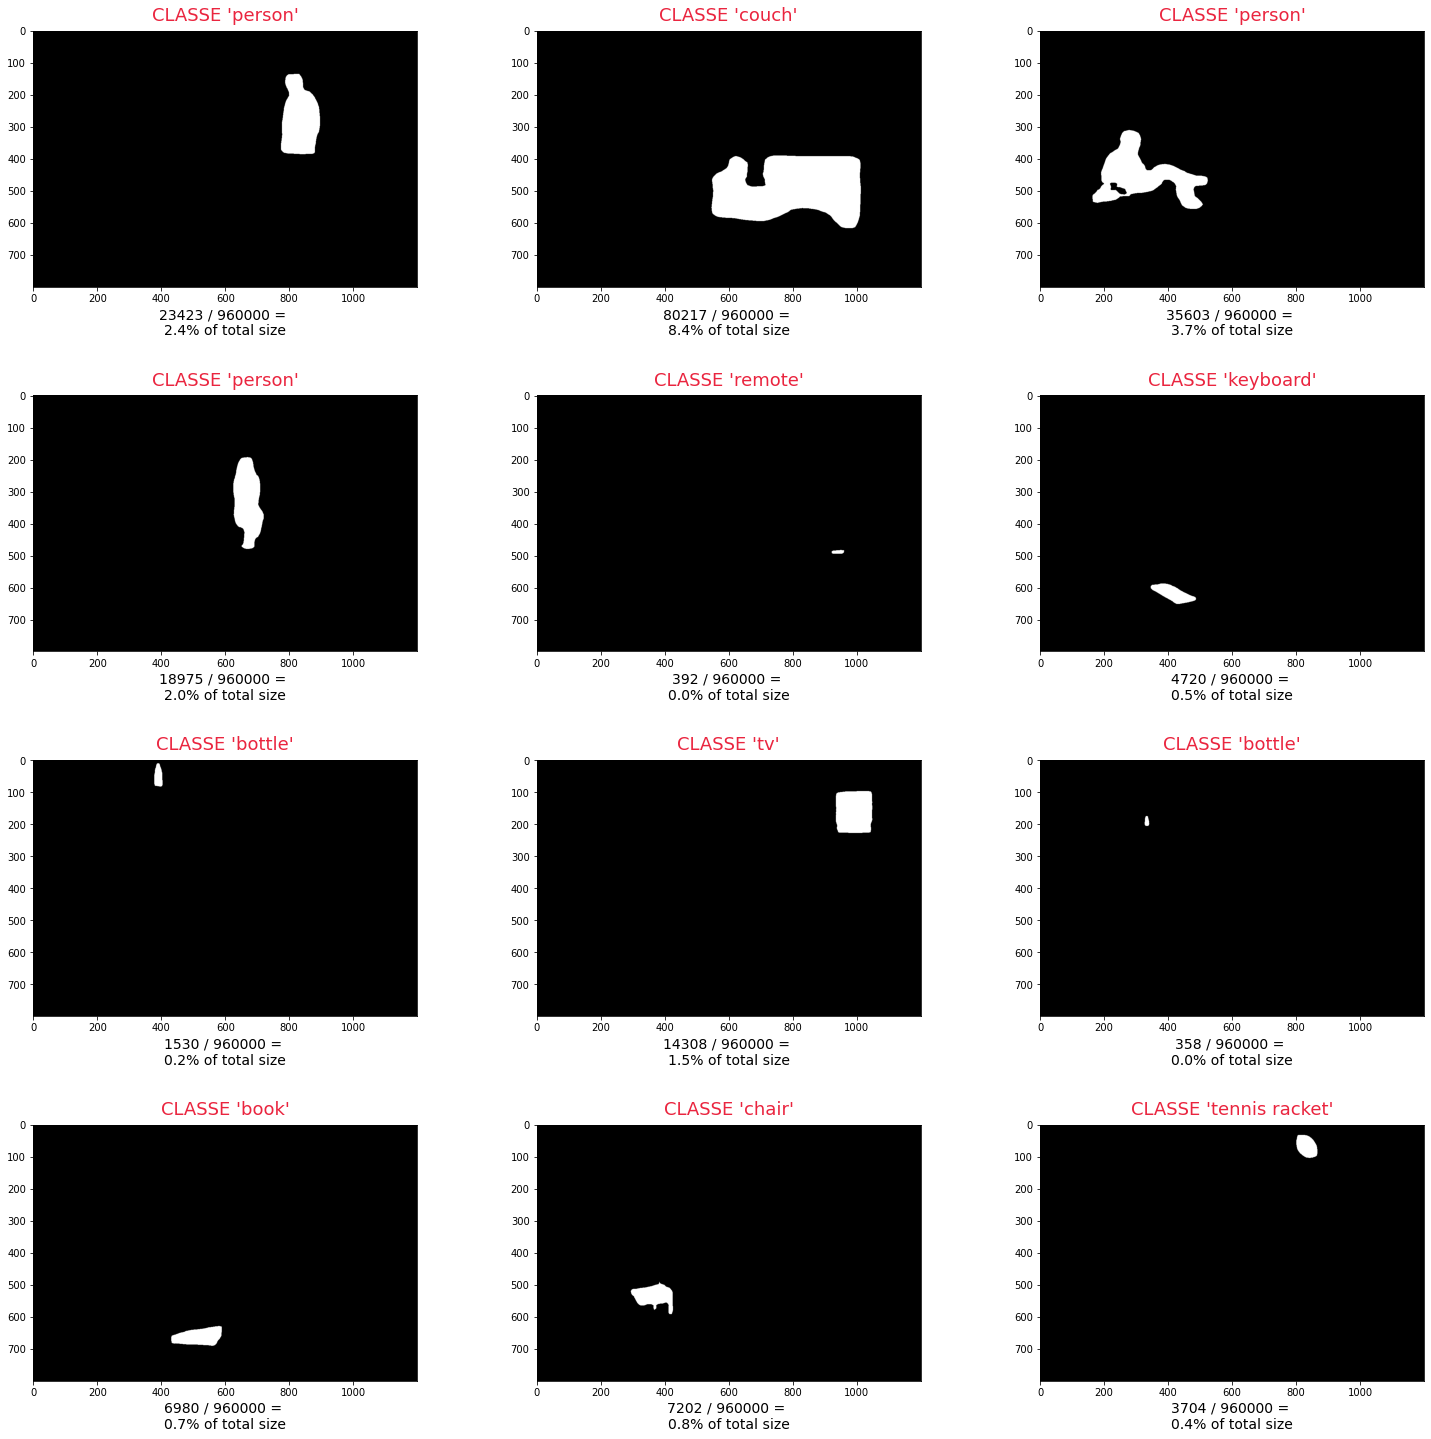

In [ ]:
list_c, list_px = show_masks(results)

In [ ]:
display_class_area_size(list_c, list_px)

px  ratio (%)
class                          
book            6980       3.54
bottle          1888       0.96
chair           7202       3.65
couch          80217      40.63
keyboard        4720       2.39
person         78001      39.51
remote           392       0.20
tennis racket   3704       1.88
tv             14308       7.25

**Test 7**

Processing 1 images
image                    shape: (771, 1101, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1101.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


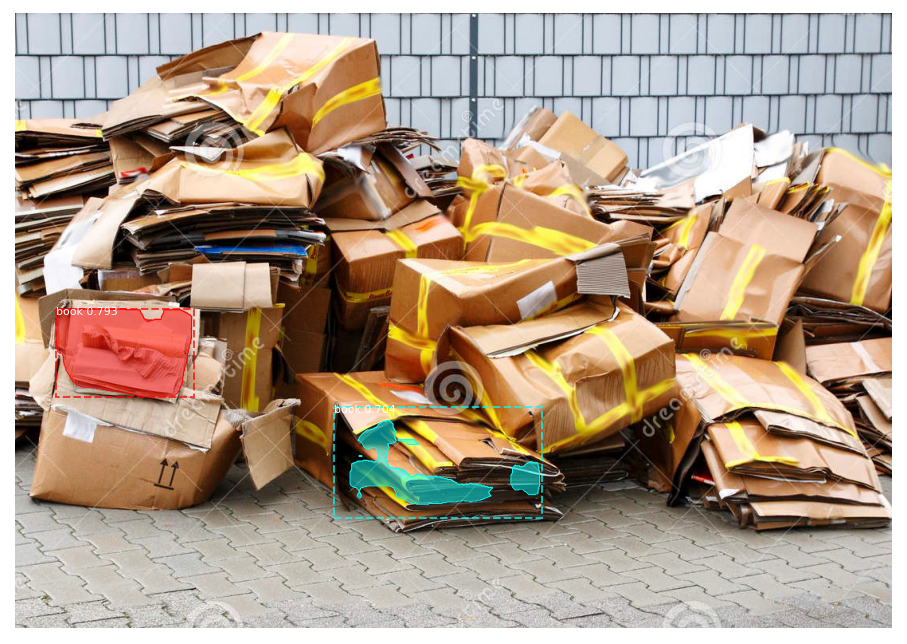

In [ ]:
image = skimage.io.imread(os.path.join(IMAGE_DIR, 'waste-paper.jpg'))
# Run detection
results = model.detect([image], verbose=1)
# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

classes: ['book', 'book']




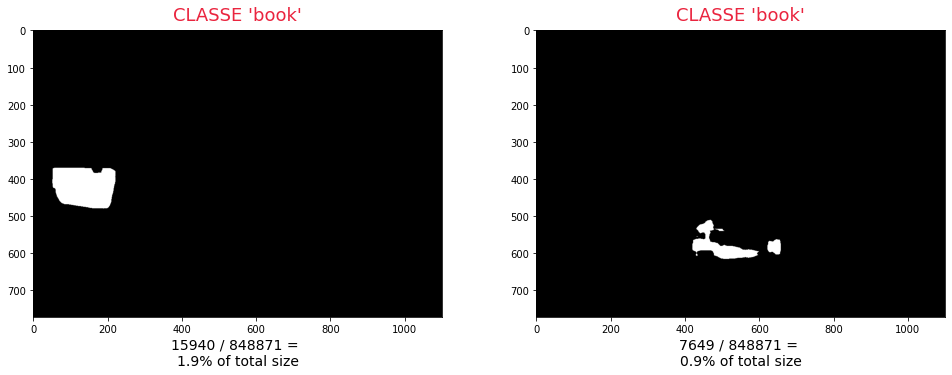

In [ ]:
list_c, list_px = show_masks(results)

In [ ]:
display_class_area_size(list_c, list_px)

px  ratio (%)
class                  
book   23589      100.0

Conclusion : Very poor results on paper waste images, which is normal as the model has not been trained on this specific class